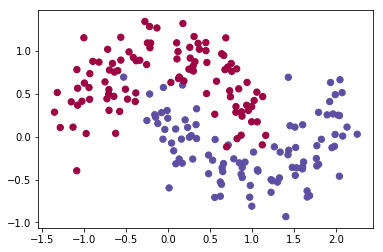

In [1]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
X,y=make_moons(200,noise=0.20)
plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.show()

In [3]:
y.shape

(200,)

In [2]:
def plot_decision_boundary(pred_func):
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
    h=0.01
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h) , np.arange(y_min,y_max,h))
    Z=pred_func(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmp=plt.cm.Spectral)
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Spectral)

**用传统的logistic回归做分类，并画出分类边界**

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'cmp'
  s)


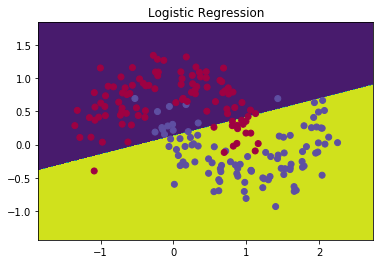

In [3]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV()
clf.fit(X,y)
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")
plt.show()

**尝试一个简单的人工神经网络**

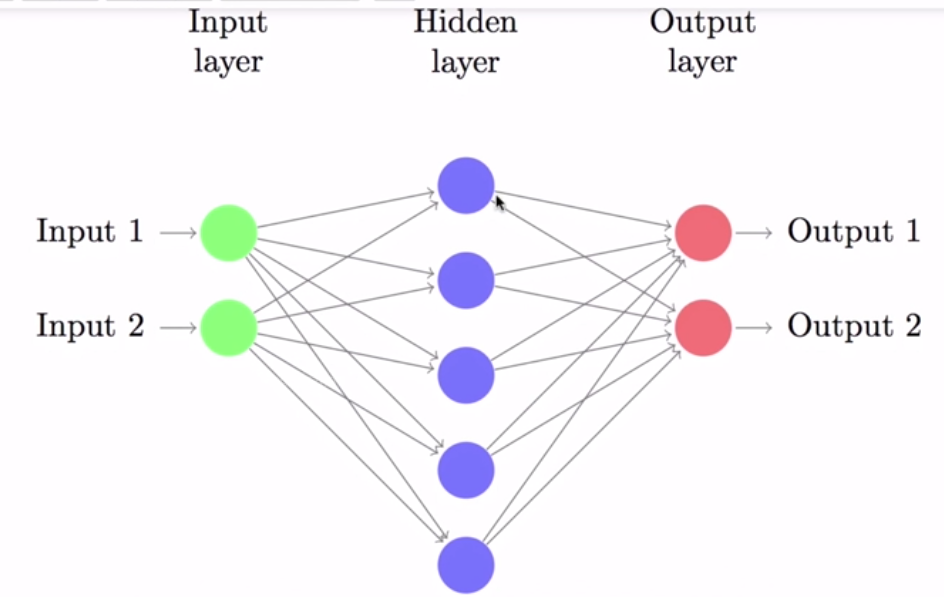

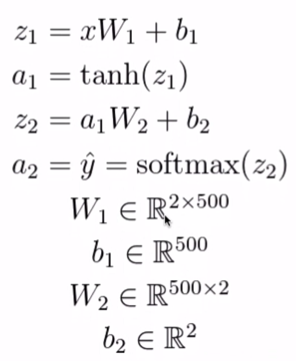

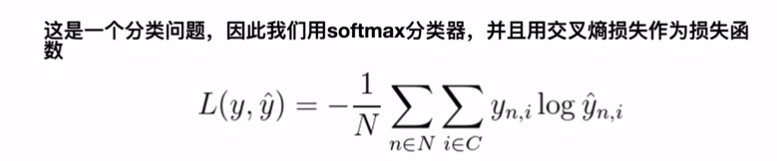

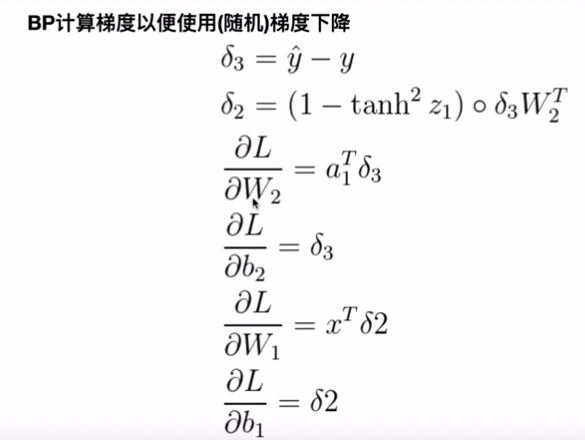

In [4]:
num_examples = len(X) # 样本数
nn_input_dim = 2 # 输入的维度
nn_output_dim = 2 # 输出的类别个数
 
# 梯度下降参数
epsilon = 0.01 # 学习率
reg_lambda = 0.01 # 正则化参数

# 定义损失函数
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # 向前推进，前向运算
    z1 = X.dot(W1) + b1 
    a1 = np.tanh(z1)    
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # 计算损失
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # 也得加一下正则化项
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

**完整的训练建模函数定义**

In [5]:
# 完整的训练建模函数定义
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    '''
    参数：
    1) nn_hdim: 隐层节点个数
    2）num_passes: 梯度下降迭代次数
    3）print_loss: 设定为True的话，每1000次迭代输出一次loss的当前值
    '''
    # 随机初始化一下权重呗
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    # 这是咱们最后学到的模型
    model = {}
     
    # 开始梯度下降...
    for i in range(0, num_passes):
    # 前向运算计算loss
    
    #####   Code here！   #####
        # 3行代码写出Z2的定义
        z1=X.dot(W1)+b1
        a1=np.tanh(z1)
        z2=a1.dot(W2)+b2
    ####    Code end.     ####
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # 反向传播
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # 加上正则化项
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        # 梯度下降更新参数
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
    #####   Code here！   #####
        # 2行代码分别写出w2和b2的定义（别忘了现在在循环里哟~）
    ####    Code end.     ####
    
        # 得到的模型实际上就是这些权重
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        # 如果设定print_loss了，那我们汇报一下中间状况
        if print_loss and i % 1000 == 0:
            print("在迭代%i轮后的损失函数值为: %f" %(i, calculate_loss(model)))
    return model

In [6]:
# 判定结果的函数
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # 前向运算
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    # 计算概率输出最大概率对应的类别
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

在迭代0轮后的损失函数值为: 0.552857
在迭代1000轮后的损失函数值为: 0.366879
在迭代2000轮后的损失函数值为: 0.363963
在迭代3000轮后的损失函数值为: 0.361978
在迭代4000轮后的损失函数值为: 0.361205
在迭代5000轮后的损失函数值为: 0.360883
在迭代6000轮后的损失函数值为: 0.360730
在迭代7000轮后的损失函数值为: 0.360650
在迭代8000轮后的损失函数值为: 0.360606
在迭代9000轮后的损失函数值为: 0.360581
在迭代10000轮后的损失函数值为: 0.360567
在迭代11000轮后的损失函数值为: 0.360558
在迭代12000轮后的损失函数值为: 0.360553
在迭代13000轮后的损失函数值为: 0.360550
在迭代14000轮后的损失函数值为: 0.360548
在迭代15000轮后的损失函数值为: 0.360547
在迭代16000轮后的损失函数值为: 0.360546
在迭代17000轮后的损失函数值为: 0.360545
在迭代18000轮后的损失函数值为: 0.360545
在迭代19000轮后的损失函数值为: 0.360545


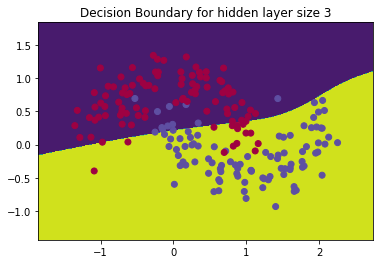

In [7]:
# 建立隐层有3个节点(神经元)的神经网络
model = build_model(3, print_loss=True)
 
# 然后再把决策/判定边界画出来
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show()


**不同隐层节点个数对结果的影响**

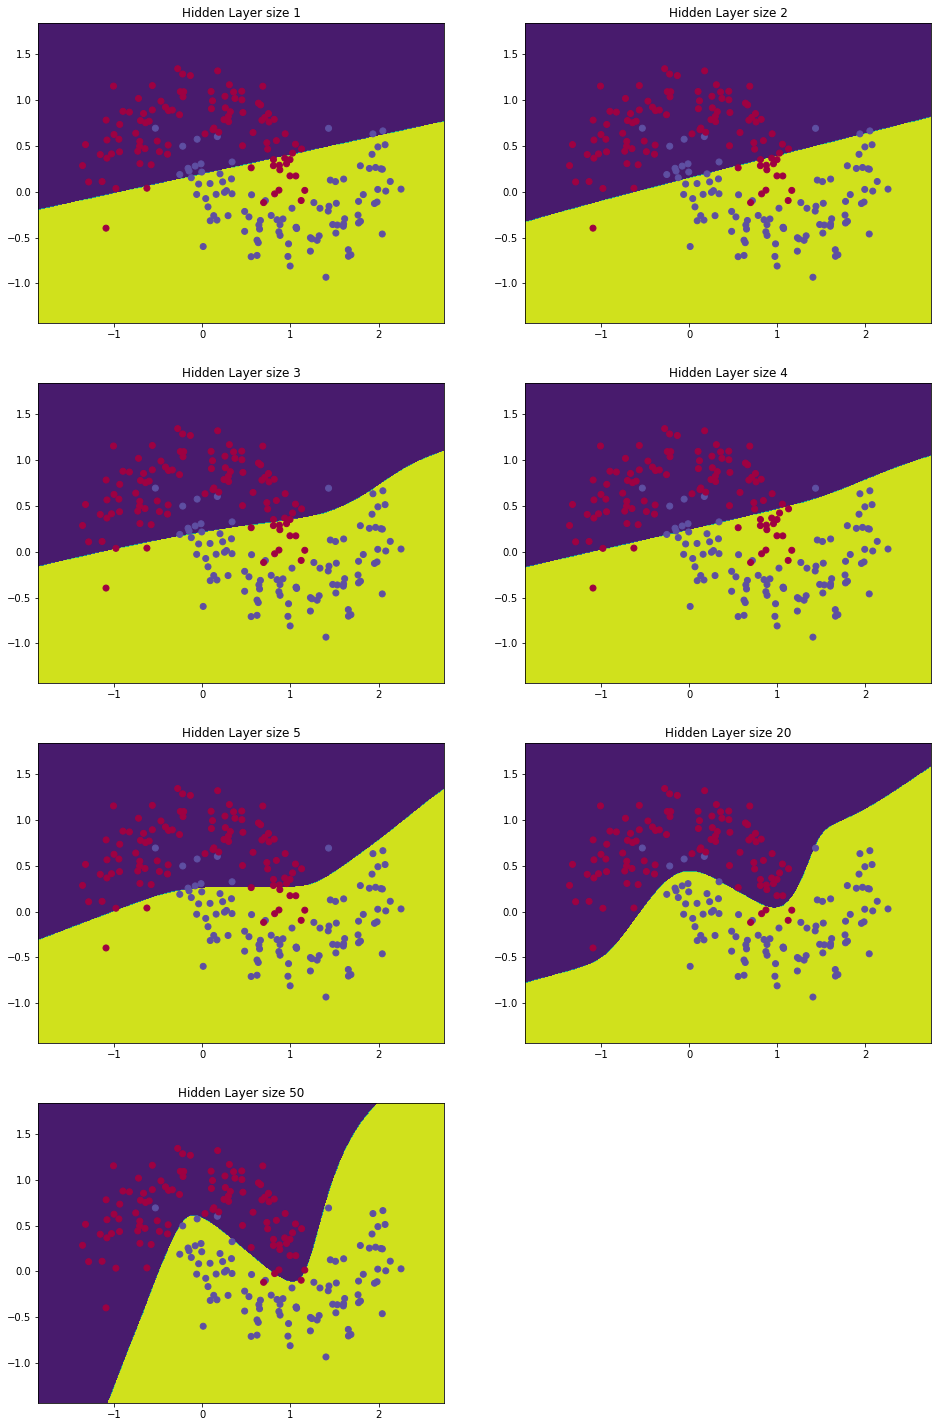

In [8]:
# 然后听闻你想知道不同的隐层神经元个数对结果的影响？
# 那咱们来一起看看吧
plt.figure(figsize=(16, 32))
# 设定不同的隐层节点(神经元)个数
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()